# История

Кластерные методы являются наиболее подходящими для анализа сложных многомерных объектов, не требуют предварительной структуризации информации, то есть можно классифицировать объекты, не имея данных о предварительном их разбиении(анализ неструктурированной совокупности прецедентов)

К таким данным относятся:

* **Тексты**
* **Даты**. Например, дни недели часто удобно рассматривать как категории. 
* **Географические объекты**. Названия сёл, городов, стран и др.
* **Категории в узком смысле**. Категории товаров в магазине; маркетенговые сегменты в банке; симптомы заболеваний у пациента и т.д.
* **Количественные шкалы, преобразованные в номинальные**. Иногда вещественные признаки градуируют и переводят в ранговые и номинальные, после чего работают уже с ними.
* **Id** объектов. Часто можно встретить в данных уже заданные отношения. Такое происходит, например, в социальных сетях. У людей есть наборы друзей, которые задаются при помощи *id*. Это представляется в виде *человек i* -> [друг 1, друг 2, ..., друг n_i]. На множестве *id* также задано отношения равенства. А значит это категориальный признак.
* ...

Для признаков, которые получаются из вышеуказанных объектов, задано только отношение эквивалентности, т.е. пары вида: 

$(a, b) = \{(a, b) \in \text{X}^2|a=b\}$

Задача кластеризации больших массивов категориальных данных весьма актуальна для систем анализа данных. Применять для кластеризации объектов с категорийными признаками традиционные алгоритмы неэффективно, а часто - невозможно

Основные трудности связаны с высокой размерностью и гиганстким объемом, которыми часто характеризуются такие бахы данных. Алгоритмы, основанные на парном вычислении расстояний(k-средних и аналоги) эффективны в основном на числовых данных. Их производительность на массивах записей с большим количеством нечисловых факторов неудовлетворительная, на каждом итерации алгоритма требуются попарно сравнивать объекты между собой, а итераций может быть очень много. Для таблиц с миллионами записями и тысячами полей это неприемлимо.

Одним из эффективных считается алгоритм **LargeItem**, который основан на оптимизации некоторого глобального критерия. Этот глобальный критерий использует параметр поддержки (в терминологии здесь много общего с алгоритмами для выявления ассоциативных правил). Вообще, вычисление глобального критерия делает алгоритм кластеризации во много раз быстрее, чем при использовании локального критерия при парном сравнении объектов, поэтому "глобализация" оценочной функции – один из путей получения масштабируемых алгоритмов.

Алгоритм **CLOPE** очень похож на LargeItem, но быстрее и проще в программной реализации. При этом он обеспечивает более высокую производительность и лучшее качество кластеризации в сравнении с алгоритмом LargeItem и многими иерархическими алгоритмами.

В основе алгоритма кластеризации CLOPE лежит идея максимизации *глобальной функции стоимости*, которая повышает близость транзакций в кластерах при помощи увеличения параметра кластерной гистограммы.

# Формальное описание алгоритма

Пусть имеется база транзакций D, состоящая из множества транзакций {$t_1$,$t_2$,…,$t_n$}. Каждая транзакция есть набор объектов {$i_1$,…,$i_m$}. Множество кластеров {$C_1$,…,$C_k$} есть разбиение множества {$t_1$,$t_2$,…,$t_n$}, такое, что $C_1$ … $C_k$={$t_1$,…,$t_n$} и

, для 1<=$i$, $j$<=$k$. Каждый элемент $C_i$ называется кластером
* $n$ - количество транзакций, 
* $m$ – количество объектов в базе транзакций,
* $k$ - число кластеров соответственно.

Каждый кластер $C$ имеет следующие характеристики:

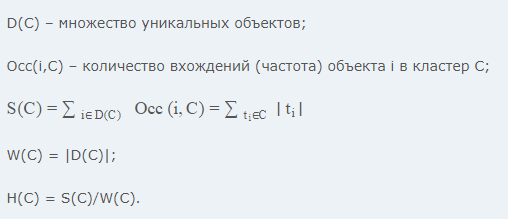

Гистограммой кластера $C$ называется графическое изображение его расчетных характеристик: по оси OX откладываются объекты кластера в порядке убывания величины $Occ(i,C)$, а сама величина $Occ(i,C)$ – по оси OY.

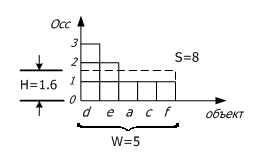

$S(C)$, равное 8, соответствует площади прямоугольника, ограниченного осями координат и пунктирной линией. Очевидно, что чем больше значение $H$, тем более "похожи" две транзакции. Поэтому алгоритм должен выбирать такие разбиения, которые максимизируют $H$.

Вообще говоря, высоту гистограммы вычислить точно нельзя, поэтому она заменяется на "усреднённое" значение. 

Как можно догадаться учитывать только высоту -- слишком плохо. В таком случае теряется "обобщающая способность". Это лего понять, если рассмотреть пример. Пусть есть 2 разбиения:

$\text{{абв, где}}$ 

и

$\text{{{абв}, {где}}}$

т.е. в одном случае имеем 2 кластера, в каждом из которых по 3 объекта. В ином случае имеем 1 кластер, в котором есть 6 объектов. Рассматривая только высоту, заключим, что она равна 1. В таком случае, разбиения не отличаются.

С другой стороны, с точки зрения логики, второе разбиение, в некотором смысле, "эффективнее", поскольку у первой и второй транзакции нет общих элементов, а значит они полностью отличны. В таком случае логичнее отнести их в разные кластеры. Чтобы обеспечить такую эффективность, вводят "штраф", который представляет собой деление высоты на ширину кластера. Т.е. мы хотим обеспечить минимальный разброс внутри каждой совокупности транзакций. 

Таким образом, чем меньше ширина, тем лучше. Чем больше высота, тем лучше. Получаем:

$\text{G(C)} = \dfrac{H}{W} = \dfrac{\frac{S}{W}}{W} = \dfrac{S}{W^2}$

На основе такой очевидной и простой идеи геометрических гистограмм и работает алгоритм CLOPE (англ.: Clustering with sLOPE). Рассмотрим его подробнее в более формальном описании.

Для параметризации алгоритма, предлагается степень в знаменателе заменить на $r$:

$\text{G(C, r)} = \dfrac{S}{W^{r}}$

Таким образом можно получить различное число кластеров. Интерпретация у параметра очень проста - это степень отталкивания. Чем больше $r$, тем дальше разлетаются кластеры. Чем меньше, тем сильнее они притягиваются.

Формула для вычисления глобального критерия – функция стоимости $Profit(C)$:

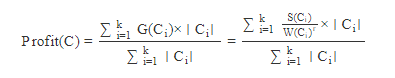

, где 
* $|Ci|$ – количество транзакций в $i$-том кластере, 
* $k$ – количество кластеров, 
* $r$ – коэффициент отталкивания (0 < $r$ < 1).

Параметр $r$ регулирует уровень сходства транзакций внутри кластера, и, как следствие, финальное количество кластеров. Этот коэффициент подбирается пользователем. Чем больше $r$, тем ниже уровень сходства и тем больше кластеров будет сгенерировано.

Умея вычислять качество разбиения $Profit(C)$, при получении нового объекта можем пытаться отнести его к одному из имеющихся кластеров, либо в новый кластер. В результате этого можно легко вычислить приращение $\Delta{Profit}({C})$ после попытки добавить новую транзакцию в один из имеющихся кластеров, либо в новый кластер. В тот кластер, где изменение $\Delta{Profit}({C})$ доставит наилучшее значение, следует добавить поступившую транзакцию.

Запишем формулу для вычисления изменения $\Delta{Profit}({C})$ при условии, что новая транзакция была добавлена в кластер $p$. Наблюдая за функцией  приращения, можно заметить, что добавляя транзакции в различные кластеры, будет меняться лишь числитель. Поэтому вычислять следует только его. Для вычисления изменения необходимо знать всего одно слагаемое из суммы, посколько все остальные сокращаются при вычитании:

$\Delta{Profit}({C}) = {Profit}({C_{new}}) - {Profit}({C_{old}})$

Таким образом, вычислим:

$\Delta{Profit}({C}) = \dfrac{S_{new}(C_p)}{W_{new}^2(C_p)}(|C_p| + 1) - \dfrac{S(C)}{W^2(C)}|C_p|$,

где $S_{new}(C_p), W_{new}(C_p)$ - величины с добавленой новой транзакцией.

Последовательно будем перебирать все транзакции и пытаться добавить каждую в какой-нибудь кластер так, чтобы $Profit$ был максимальным, пока все транзакции не закончатся. Как только все транзакции закончатся, следует перебрать их ещё раз и пытаться переложить каждую транзакцию в другой кластер, так, чтобы $Profit$ увеличился. Так будем делать до тех пор, пока транзакции можно будет переложить.

Таким образом, формальная постановка задачи кластеризации алгоритмом **CLOPE** выглядит следующим образом: для заданных $D$ и $r$ найти разбиение $C: Profit(C,r)$ -> max.

# Пример

Пусть у нас есть 5 транзакций. Для простоты, под транзакциями можно мыслить корзину покупок, которую делали пользователи в интернет-магазине. Рассмотрим 5 транзакций:

$\{\text{(яблоко, банан), (яблоко, банан, пирожоное), (яблоко, пирожоное, тарелка), (тарелка, утка), (тарелка, утка, рыба)}\} = \{\text{(я, б), (я, б, п), (я, п, т), (т, у), (т, у, р)}\} = \{\text{яб, ябп, япт, ту, тур}\}$

Как-нибудь разобьём наши транзакции двумя способами, предварительно отсортировав:

Разбиение 1: $\{\{\text{яб, ябп, япт}\}, \{\text{ту, тур}\}\}$

Разбиение 2: $\{\{\text{яб, ябп}\}, \{\text{япт, ту, тур}\}\}$

Теперь нужно научиться как-то сравнивать разбиения. Интуитивно понятно, что чем больше общих элементов в разбиении, тем лучше. Авторы алгоритма предложили элегантный способ сравнения таких объектов. Построим частотную гистограмму признаков, которые входят в каждый кластер:


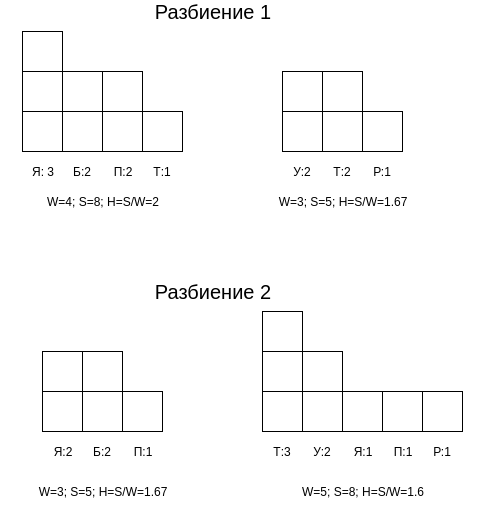

Качество двух разбиений оценим, проанализировав их высоту $H$ и ширину $W$. Под $W$ будем понимать количество различных признаков. Кластеры $\text{{ту, тур}}$ и $\text{{яб, ябп}}$ имеют одинаковые гистограммы, следовательно, равноценны. Гистограмма для кластера $\text{{яб, ябп, япт}}$ содержит 4 различных элемента и имеет площадь 8 блоков ($H=2, \dfrac{H}{W}=0.5$), а кластер $\text{{япт, ту, тур}}$ – 5 различных элементов с такой же площадью ($H=1.6, \dfrac{H}{W}=0.32$). Очевидно, что разбиение 1 лучше, поскольку обеспечивает большее наложение транзакций друг на друга (соответственно, параметр $H$ там выше).

### Вычисления для примера выше

Проведём вычисления для примера выше. Рассмотрим разбиение 1, кластер 1:

$C = \{яб, ябп, япт\}$

Уникальные объекты:

$D(C)=D(\{яб, ябп, япт\}) = \{я, п, б, т\}$

Ширина гистограммы:

$W(C) = |D(C)| = |\{я, п, б, т\}| = 4$

Частоты:

$Occ(я,C)=3$

$Occ(б,C)=2$

$Occ(п,C)=2$

$Occ(т,C)=1$

Площадь:

$S(C)=Occ(я,C)+Occ(б,C)+Occ(п,C)+Occ(т,C)=3+2+2+1=8$

Средняя высота:

$H(C)=\dfrac{S(C)}{W(C)}=\dfrac{8}{4}=2$

Целевая функция для отдельно взятого кластера:

$G(C, 2)=\dfrac{S(C)}{W^2(C)}=0.5$

### Пример с добавлением нового объекта

Задим транзакции, как это сделано в примере выше:

$\{\text{яб, ябп, япт, ту, тур}\}$

Будем последовательно перебирать их и добавлять в кластеры. Изначально считаем, что у нас в наличии есть один пустой кластер. При добавлении транзакции в пустой кластер, создадим ещё один пустой. Проделаем несколько шагов. 

**Обрабатываем $\text{{яб}}$**

*Шаг 1*

Возьмём $\text{{яб}}$ и попытаемся добавить в пустой кластер $C_0$. Посчитаем характеристики:

$Occ(я,C_0)=1$

$Occ(б,C_0)=1$

$D(C_0)=D(\{яб\}) = \{я, б\}$

$W(C_0)=|D(C_0)|=|\{я,б\}| = 2$

$S(C_0)=Occ(я,C_0)+Occ(б,C_0)=1+1=2$

$H(C_0)=\dfrac{S(C_0)}{W(C_0)}=\dfrac{8}{4}=1$

$G(C_0, 2)=\dfrac{S}{W^2}=0.5$

$\Delta\text{Profit}(\mathbb{C_0}) = G_{new}(|C_0| + 1) - G|C_0| = 0.5$

Других кластеров нет. Зафиксируем все вычисленные значения.

*Шаг 2*

Возьмём $\text{{ябп}}$ и попытаемся добавить в кластер $C_0$. Посчитаем характеристики:

$D(C_0)=\{я, б, п\}$

$W(C_0)=|\{я,б,п\}|=3$

$S(C_0)=Occ(я,C_0)+Occ(б,C_0)+Occ(п,C_0)=2+2+1=5$

$H(C_0)=\dfrac{S}{W}=\dfrac{5}{3}$

$G(C_0, 2)=\dfrac{S}{W^2}=\dfrac{5}{9}$

$\Delta\text{Profit}(\mathbb{C_0}) = G_{new}(|C_0| + 1) - G|C_0| = 2\dfrac{5}{9}-\dfrac{1}{2}=\dfrac{11}{18}$

Создадим пустой кластер $C_1$ и добавим транзакцию туда. Посчитаем характеристики:

$D(C_1)=\{я, б, п\}$

$W(C_1)=|\{я,б,п\}|=3$

$S(C_1)=Occ(я,C_1)+Occ(б,C_1)+Occ(п,C_1)=1+1+1=3$

$H(C_1)=\dfrac{S}{W}=1$

$G(C_1, 2)=\dfrac{S}{W^2}=\dfrac{1}{3}$

$\Delta\text{Profit}(\mathbb{C_0})=\dfrac{1}{3}$

Так как прирост при добавлении в $C_0$ больше. Поэтому транзакция будет добавлена туда.

И так далее...

# Реализация

Определим алгорим:

* инициализируем все кластеры, пройдя по всем транзакциям и попытавшись добавить каждую в один из кластеров
* попытаемся перераспределить транзакции между ними. Важно заметить, что на каждой итерации, после удаления, нужно удалять пустые кластеры

Для начала, объявим класс `Cluster`:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


class Cluster:

    def __init__(self, history_count):
        # История количества транзакций в кластерах
        self.history_count_transact = [0] * history_count
        # Площадь гистограммы
        self.area = 0.0
        # Высота гистограммы (в смысле H = S / W). Данная величина нигде в явном виде не вычисляется.
        # Хранится в классе для полноты описания класса и не более того.
        self.height = 0.0
        # Ширина гистограммы (в смысле числа элементов)
        self.width = 0.0
        # Градиент (в смысле G = H / W). Данная величина нигде в явном виде не вычисляется. Хранится в классе
        # для полноты описания класса и не более того.
        self.gradient = 0.0
        # Число транзакций
        self.count_transactions = 0
        # Гистограмма
        self.histogram = {}

    '''
    Добавить транзакцию в кластер. Перебираем все элементы гистограммы, достраиваем гистограмму
    Input parametres:
    transaction -- слайс с объектами (транзакция)
    '''
    def add_transaction(self, transaction):
        # Поочерёдно перебираем все элементы гистограммы и добавляем в соответствующий столбец гистограммы. Если
        # рассматриваемого элемента нет, то добавим новый столбец в гистограмму
        for item in transaction:
            if not (item in self.histogram):
                self.histogram[item] = 1
            else:
                self.histogram[item] += 1
        # Вчисляем суммарную площадь гистограммы в смысле CLOPE (количество транзакций)
        self.area += float(len(transaction))
        # Вычисляем ширину гистограммы (количество различных объектов)
        self.width = float(len(self.histogram))
        # Подсчитываем число транзакций в кластере
        self.count_transactions += 1

    '''
    Удалить транзакцию из кластера. Перебираем все элементы гистограммы, убираем все элементы транзакции из
    гистограммы
    
    Input parametres:
    transaction -- слайс с объектами (транзакция)
    Returned values:
    величина градиента G(transaction)
    
    Внутри класса не происходит слежение за тем, какие транзакции добавляются, какие удаляются, поэтому, если в
    процессе модификации будет исключена транзакция, которая не была добавлена в соответствующий кластер, алгоритм
    выдаст неверный результат
    '''
    def remove_transaction(self, transaction):
        for item in transaction:
            if self.histogram[item] == 0:
                del self.histogram[item]
        self.area -= float(len(transaction))
        self.width = float(len(self.histogram))
        self.count_transactions -= 1
        return self.gradient

Определим класс `CLOPE`, содержащий в себе

* Инициализация кластеров
* Добавление новой транзакции к кластеру
* Удаление транзакции из кластера
* Вычисление приращения

Ряд функций пока что будут непонятны, но о них мы обязательно поговорим позже:

In [4]:
class CLOPE:

    def __init__(self, is_save_history=True, print_step=1000, random_seed=None):
        if random_seed is not None:
            self.random_seed = random_seed
        else:
            self.random_seed = np.random.random_integers(0, 65536)
        # Список кластеров
        self.clusters = {}  # CCluster
        # Номера шумовых кластеров
        # Данный объект необходим для того, чтобы не брать во внимание те объкты, которые были отнесены к шумовым
        self.noise_clusters = {}
        # Количество добавленных транзакций
        self.count_transactions = 0
        # Номер итерации
        self.iteration = 0
        # Словарь. ключ/значение : номер транзакции/номер кластера
        self.transaction = {}
        # Максимальный номер кластера
        self.max_cluster_number = 0
        self.print_step = print_step
        self.is_save_history = is_save_history

    '''
    Рассчитывается изменение Goal, которое получит целевая функция при добавлении транзакции к кластеру clusterNumber.
    Кластер, доставляющий максимальное значение функции, будет искомым кластером (в который следует добавить
    транзакцию)
    Input parametres:
    transaction -- транзакция (список объектов)
    clusterNumber -- номер кластера, приращение для которого рассчитывается
    r -- отталкивание в смысле CLOPE
    Returned value:
    Возвращает значение изменения целевой функции при добавлении transaction к кластеру clusterNumber
    '''
    def delta_transaction(self, transaction, cluster_number, r):
        area = self.clusters[cluster_number].area + len(transaction)
        width = self.clusters[cluster_number].width
        for item in transaction:
            if not (item in self.clusters[cluster_number].histogram):
                width += 1
        if width != 0:
            new_delta_value = area * (self.clusters[cluster_number].count_transactions + 1) / (width ** r)
        else:
            new_delta_value = 0
        if self.clusters[cluster_number].width != 0:
            old_delta_value = self.clusters[cluster_number].area * self.clusters[cluster_number].count_transactions / (
                self.clusters[cluster_number].width ** r)
        else:
            old_delta_value = 0
        return new_delta_value - old_delta_value

    '''
    Функция удаления шума. Все кластеры, размер которых больше limit остаются
    Input parametres:
    limit -- уровень шума кластеров
    '''
    def noise_reduction(self, limit):
        # Удаляем все пустые и зашумлённые кластеры
        new_clusters = {}
        for item in self.clusters:
            if self.clusters[item].count_transactions > limit:
                new_clusters[item] = self.clusters[item]
            else:
                self.noise_clusters[item] = True
        self.clusters = new_clusters

    '''
    Вычисление целевой функции для всех уже сформированных кластеров
    Используется при модификации кластеров, либо их инициализации
    Input parametres:
    r -- вещественное число, обозначающие отталкивание кластеров в смысле CLOPE
    Returned value:
    Возвращает значение целевой функции
    '''
    def get_goal_function(self, r):
        measure = 0.0
        # Перебираем все кластеры и для каждого рассчитываем его вес. Все веса суммируются в общую метрику
        for item in self.clusters:
            if item.width == 0:
                # print "test"
                pass
            else:
                # Попытка подобрать иную метрику
                # measure += (r ** 2 * math.log(item.Area ** (1 / r) / item.Width) ** 2) *
                # item.CountTransactions / self.CountTransactions
                measure += item.area / (item.width ** r) * item.count_transactions / self.count_transactions
        return measure

    '''
    Добавление новой транзакции
    Пытаемся перераспределить транзакцию (transaction) с номером id в другой класс так, чтобы целевая функция приняла
    максимальное значение
    Input parametres:
    transaction -- транзакция (слайс с объектами)
    id -- номер транзакции
    repulsion -- вещественное число, обозначающие отталкивание кластеров в смысле CLOPE
    isSaveHistory -- флаг, выставляемый при необходимости записи истории количества транзакций
    Returned parameter:
    Возвращается номер кластера, в который была добавлена текущая транзакция
    '''
    def move_transaction(self, transaction, id, repulsion=2, max_count_clusters=None):
        r = repulsion
        max_value = None
        max_value_index = None
        self.count_transactions += 1

        # Ищем кластер, на котором будет достигнуто максимальное значение изменения целевой функции
        for cluster_number in self.clusters:
            # Пишем историю
            if self.is_save_history:
                self.clusters[cluster_number].history_count_transact.append(
                    self.clusters[cluster_number].count_transactions
                )

            delta = self.delta_transaction(transaction, cluster_number, r)
            if (delta > 0 or max_count_clusters is not None) and (max_value is None or delta > max_value):
                max_value_index = cluster_number
                max_value = delta

        # Добавляем транзакцию в новый кластер и смотрим на результат
        if max_count_clusters is None or len(self.clusters) < max_count_clusters:
            self.clusters[self.max_cluster_number] = Cluster(self.count_transactions)
            if max_value is None or self.delta_transaction(transaction, self.max_cluster_number, r) > max_value:
                max_value_index = self.max_cluster_number
                self.max_cluster_number += 1
            else:
                del self.clusters[self.max_cluster_number]

        # Запоминаем, в каком кластере лежит текущая транзакция
        self.transaction[id] = max_value_index

        # Добавляем транзакцию в необходимый кластер
        self.clusters[max_value_index].add_transaction(transaction)

        return max_value_index

    '''
    Адаптивное вычисление порога шума. Порог вычистывается относительно медианы размеров кластеров (в числе
    транзакций). Берётся 3/4 медианы
    '''
    def get_noise_limit(self, percentile=0.75):
        size_clusters = []
        for item in self.clusters:
            size_clusters.append(self.clusters[item].count_transactions)
        sorted(size_clusters)
        median_element = int(len(size_clusters) * percentile) + 1
        if len(size_clusters) < 5:
            limit = 10
        else:
            limit = size_clusters[median_element]
        return limit

    '''
    Инициализация кластеров
    Input parametres:
    data -- слайс с транзакциями
    isPrint -- нужно ли печатать информацию о ходе выполнения (0 -- не нужно, если > 0 -- печатаем каждый isPrint раз)
    repulsion -- вещественное число, обозначающие отталкивание кластеров в смысле CLOPE
    isSaveHistory -- флаг, выставляемый при необходимости записи истории количества транзакций
    isNoiseReduction -- подавление шума (порог соответствует числу элементов в кластере, при котором он уничтожается).
                        Если isNoiseReduction == -1, то порог выбирается адаптивно (всё то, что больше медианы
                        остаётся)
    '''
    def init_clusters(self, data, repulsion=2, is_noise_reduction=-1, noise_median_threshold=0.75,
                      max_count_clusters=None):
        index = 0
        keys = sorted(data.keys())
        np.random.seed(self.random_seed)
        np.random.shuffle(keys)
        for item in keys:
            self.move_transaction(data[item], item, repulsion, max_count_clusters)
            index += 1
            if self.print_step > 0 and index % self.print_step == 0:
                print("Итерация: ", self.iteration, ". Номер шага", index, ". Число кластеров: ", len(self.clusters))

        # Получаем оптимальный порог шума
        if is_noise_reduction < 0:
            is_noise_reduction = self.get_noise_limit(noise_median_threshold)
        # Удаляем все шумовые кластеры (после инициализации не бывает пустых классов, поэтому знак строго больше)
        if is_noise_reduction > 0:
            self.noise_reduction(is_noise_reduction)

        self.iteration = 1

    '''
    Выполнение алгоритма. Выполнение следующего шага
    Input parametres:
    data -- слайс с транзакциями
    isPrint -- нужно ли печатать информацию о ходе выполнения (0 -- не нужно, если > 0 -- печатаем каждый isPrint раз)
    repulsion -- вещественное число, обозначающие отталкивание кластеров в смысле CLOPE
    isSaveHistory -- флаг, выставляемый при необходимости записи истории количества транзакций
    isNoiseReduction -- подавление шума (порог соответствует числу элементов в кластере, при котором он уничтожается).
                        Если isNoiseReduction == -1, то порог выбирается адаптивно (всё то, что больше медианы
                        остаётся)
    Returned parameter:
    Возвращается число операций по перенесению транзакции из кластера в кластер
    '''
    def next_step(self, data, repulsion=2, is_noise_reduction=-1, noise_median_threshold=0.75, max_count_clusters=None):

        # Удаляем все пустые (или шумовые, если isNoiseReduction > 0) кластеры
        if is_noise_reduction < 0:
            is_noise_reduction = self.get_noise_limit(noise_median_threshold)
        self.noise_reduction(is_noise_reduction)

        index = 0
        # Количество транзакций, которые были переложены
        eps = 0
        keys = sorted(data.keys())
        np.random.seed(self.random_seed)
        np.random.shuffle(keys)
        for id in keys:
            # Смотрим, где данная транзакция лежит сейчас
            cluster_number = self.transaction[id]
            transaction = data[id]
            # Если транзакция относится к шумовому кластеру, то не пытаемся её поменять
            if cluster_number in self.noise_clusters:
                eps += 0
            else:
                # Извлекаем транзакцию из текущего кластера
                self.clusters[cluster_number].remove_transaction(transaction)
                # Рассматриваем транзакцию как вновь пришедшую и добавляем в тот кластер, где значение целевой
                # функции доставит максимум
                eps += int(
                    self.move_transaction(transaction, id, repulsion, max_count_clusters)
                    !=
                    cluster_number
                )

            index += 1
            if self.print_step is not None and self.print_step > 0 and index % self.print_step == 0:
                print("Итерация: ", self.iteration, ". Номер шага", index, ". Число кластеров: ", len(self.clusters))
        self.iteration += 1

        self.noise_reduction(is_noise_reduction)
        return eps

    '''
    Рисуем график, демонстрирующий количество транзакций в различных классах
    '''
    def print_history_count(self, repulsion, seed):
        # Длина всех векторов с историями одинакова. В связи с этим, берём длину первого
        len_history = len(list(self.clusters.values())[0].history_count_transact)
        for index_cluster in self.clusters:
            item_cluster = self.clusters[index_cluster]
            x = np.array(range(0, len_history))
            if len(item_cluster.history_count_transact) != 0:
                y = item_cluster.history_count_transact
            else:
                y = np.array(range(0, len_history))
            plt.plot(x, y)
        plt.xlabel(u"Номер итерации")
        plt.ylabel(u"Количество транзакций")
        plt.title(u"Количество транзакций в различных кластерах. \nКоличество кластеров: "+str(len(self.clusters))+
                  u".\n Отталкивание: "+str(repulsion)+". Seed: "+str(seed))
        plt.show()


Рассчитывается изменение G, которое получит целевая функция при добавлении транзакции к кластеру clusterNumber

# CLOPE. Примеры решения задач

### Кластеризация грибов на съедобные и несъедобные

Данные представляют собой *8124* примера. Каждый пример состоит из 23 признака, каждый из которых кодируется буквой. В качестве примера приведём первые 7 строк:

    p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
    e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
    e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
    p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
    e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
    e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
    e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
    
Первый признак являет собой метку о съедобности или несъедобности грибов и представляет наиболее важную характеристику. Поэтому во время кластеризации использовать её не будем и рассмотрим лишь остальные 22 признака.

Так как каждый столбец являет собой букву, которые могут встречаться в других признаках, их нужно перенумеровать. Сделаем это так:

    x0,s1,n2,t3,p4,f5,c6,n7,k8,e9,e10,s11,s12,w13,w14,p15,w16,o17,p18,k19,s20,u21

Для некоторых признаков существуют пропуски, которые обозначены `?`. Поэтому эти данные нужно выкинуть:

    x0,y1,b2,t3,n4,f5,c6,b7,e8,e9,  ?  ,s11,s12,e13,w14,p15,w16,t17,e18,w19,c20,w21
    
Получим:

    x0,y1,b2,t3,n4,f5,c6,b7,e8,e9,      s11,s12,e13,w14,p15,w16,t17,e18,w19,c20,w21

Важно отметить, что **вопрос наличия пропусков никак не влияет на алгоритм**. Это очень важный аспект. Наша транзакция станет меньше на 1 объект.

Представим код, подготавливающий данные и выполняющий кластеризацию. Затем подведём результаты:

In [10]:
f = open(r'C:\Users\HP\Notebooks\DataSets\agaricus-lepiota.data', 'r')
# Разделяем данные
mushroomsStart = [item.replace('\n', '').split(',') for item in f.readlines()]
seed = 40
np.random.seed(seed)
np.random.shuffle(mushroomsStart)
mushrooms = {}
miss_count = 0
# Чистим данные
for exampleIndex in range(0, len(mushroomsStart)):
    for index in range(0, len(mushroomsStart[exampleIndex])):
        # Первый столбец -- признак (съедобные (e) или нет(p)). Данный столбец является целым классом. По этому столбцу
        # проверяется качество тестирования
        if index != 0:
            if mushroomsStart[exampleIndex][index] != '?':
                mushrooms[exampleIndex][index - 1] = mushroomsStart[exampleIndex][index] + str(index-1)
            else:
                print('Пропущен объект. Номер транзакции:', exampleIndex, '. Номер объекта:', index)
                miss_count += 1
        else:
            mushrooms[exampleIndex] = [''] * 22

Пропущен объект. Номер транзакции: 0 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6 . Номер объекта: 11
Пропущен объект. Номер транзакции: 9 . Номер объекта: 11
Пропущен объект. Номер транзакции: 10 . Номер объекта: 11
Пропущен объект. Номер транзакции: 12 . Номер объекта: 11
Пропущен объект. Номер транзакции: 13 . Номер объекта: 11
Пропущен объект. Номер транзакции: 14 . Номер объекта: 11
Пропущен объект. Номер транзакции: 16 . Номер объекта: 11
Пропущен объект. Номер транзакции: 17 . Номер объекта: 11
Пропущен объект. Номер транзакции: 18 . Номер объекта: 11
Пропущен объект. Номер транзакции: 20 . Номер объекта: 11
Пропущен объект. Номер транзакции: 22 . Номер объекта: 11
Пропущен объект. Номер транзакции: 32 . Номер объекта: 11
Пропущен объект. Номер транзакции: 33 . Номер объекта: 11
Пропущен объект. Номер транзакции: 35 . Номер объекта: 11
Пропущен объект. Номер транзакции: 41 . Номер объекта: 11
Пропущен объект. Н

Пропущен объект. Номер транзакции: 1095 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1096 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1101 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1109 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1110 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1111 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1115 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1116 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1118 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1119 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1123 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1127 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1130 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1133 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1135 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1138 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1141 

Пропущен объект. Номер транзакции: 1828 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1829 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1834 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1840 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1846 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1852 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1855 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1862 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1870 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1871 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1874 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1876 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1884 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1888 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1889 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1891 . Номер объекта: 11
Пропущен объект. Номер транзакции: 1896 

Пропущен объект. Номер транзакции: 2452 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2453 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2454 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2456 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2467 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2471 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2480 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2483 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2484 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2487 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2492 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2496 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2498 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2499 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2502 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2505 . Номер объекта: 11
Пропущен объект. Номер транзакции: 2511 

Пропущен объект. Номер транзакции: 3227 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3229 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3240 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3246 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3247 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3248 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3249 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3255 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3256 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3261 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3262 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3265 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3269 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3272 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3274 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3282 . Номер объекта: 11
Пропущен объект. Номер транзакции: 3285 

Пропущен объект. Номер транзакции: 4343 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4348 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4350 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4352 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4356 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4361 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4366 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4367 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4369 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4370 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4371 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4379 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4381 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4387 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4388 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4389 . Номер объекта: 11
Пропущен объект. Номер транзакции: 4392 

Пропущен объект. Номер транзакции: 5085 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5092 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5097 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5105 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5111 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5115 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5119 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5120 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5122 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5133 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5134 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5136 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5142 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5147 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5151 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5161 . Номер объекта: 11
Пропущен объект. Номер транзакции: 5169 

Пропущен объект. Номер транзакции: 6007 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6008 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6012 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6013 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6014 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6015 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6017 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6018 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6020 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6021 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6022 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6025 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6026 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6027 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6029 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6035 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6037 

Пропущен объект. Номер транзакции: 6449 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6450 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6456 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6458 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6459 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6460 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6466 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6469 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6473 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6477 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6479 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6484 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6485 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6492 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6494 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6495 . Номер объекта: 11
Пропущен объект. Номер транзакции: 6496 

Пропущен объект. Номер транзакции: 7143 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7144 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7146 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7152 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7153 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7160 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7161 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7166 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7178 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7179 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7180 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7188 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7194 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7197 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7198 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7204 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7205 

Пропущен объект. Номер транзакции: 7703 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7704 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7713 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7716 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7717 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7724 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7728 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7734 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7747 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7748 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7751 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7753 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7754 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7758 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7759 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7761 . Номер объекта: 11
Пропущен объект. Номер транзакции: 7763 

In [11]:
print('Общее число пропущенных объектов:', miss_count)

Общее число пропущенных объектов: 2480


In [12]:
def get_count_clusters(clope):
    # Выводим распределение по кластерам съедобных и несъедобных грибов
    answ = []
    for item in range(0, clope.max_cluster_number):
        answ.append({'e': 0, 'p': 0})
    for itemTransact in clope.transaction:
        cluster = clope.transaction[itemTransact]
        if mushroomsStart[itemTransact][0] == 'e':
            answ[cluster]['e'] += 1
        else:
            answ[cluster]['p'] += 1

    return pd.DataFrame(answ)

In [13]:
clope = CLOPE(print_step=1000, is_save_history=True, random_seed=seed)
# Начальные данные
repulsion = 3
noiseLimit = 0
# Инициализируем алгоритм
clope.init_clusters(mushrooms, repulsion, noiseLimit)
df = get_count_clusters(clope)
df

Итерация:  0 . Номер шага 1000 . Число кластеров:  25
Итерация:  0 . Номер шага 2000 . Число кластеров:  25
Итерация:  0 . Номер шага 3000 . Число кластеров:  25
Итерация:  0 . Номер шага 4000 . Число кластеров:  25
Итерация:  0 . Номер шага 5000 . Число кластеров:  25
Итерация:  0 . Номер шага 6000 . Число кластеров:  25
Итерация:  0 . Номер шага 7000 . Число кластеров:  25
Итерация:  0 . Номер шага 8000 . Число кластеров:  25


,e,p
0,0,1728
1,0,32
2,1726,0
3,288,0
4,192,0
5,512,0
6,0,1296
7,0,256
8,96,0
9,763,0


После первой итерации имеем кластеризацию следующего толка (каждая строка -- отдельный кластер, столбец обозначает признак: *e* (съедобный), *p* (несъедобный)). Распределение представлено выше, в таблице.

Как видим, не существует кластеров, в которых одновременно содержится съедобный и несъедобный грибы. Разумеется, это зависит от того, какой параметр отталкивания выбран, но в силу того, что этот параметр один, выбрать его может быть не слишком сложно. Небольшой оптимизацией **GridSearch** можно получить эффективный алгоритм. Этот вопрос обсудим ниже.

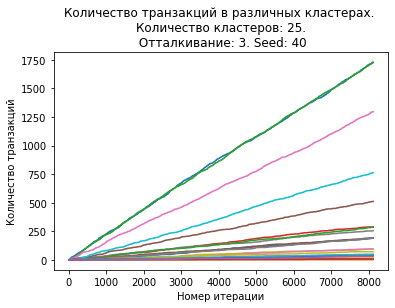

In [14]:
clope.print_history_count(repulsion, seed)

Проделаем ещё несколько шагов так, чтобы алгоритм сошёлся:

Итерация:  1 . Номер шага 1000 . Число кластеров:  25
Итерация:  1 . Номер шага 2000 . Число кластеров:  25
Итерация:  1 . Номер шага 3000 . Число кластеров:  25
Итерация:  1 . Номер шага 4000 . Число кластеров:  25
Итерация:  1 . Номер шага 5000 . Число кластеров:  25
Итерация:  1 . Номер шага 6000 . Число кластеров:  25
Итерация:  1 . Номер шага 7000 . Число кластеров:  25
Итерация:  1 . Номер шага 8000 . Число кластеров:  25


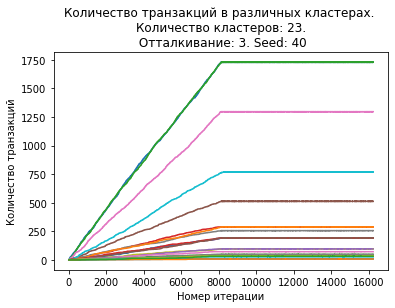

Итерация:  2 . Номер шага 1000 . Число кластеров:  23
Итерация:  2 . Номер шага 2000 . Число кластеров:  23
Итерация:  2 . Номер шага 3000 . Число кластеров:  23
Итерация:  2 . Номер шага 4000 . Число кластеров:  23
Итерация:  2 . Номер шага 5000 . Число кластеров:  23
Итерация:  2 . Номер шага 6000 . Число кластеров:  23
Итерация:  2 . Номер шага 7000 . Число кластеров:  23
Итерация:  2 . Номер шага 8000 . Число кластеров:  23


In [15]:
while clope.next_step(mushrooms, repulsion, noiseLimit) > 0:
    clope.print_history_count(repulsion, seed)

Как видим, алгоритм сходится крайне быстро. Через 2 итерации получаем финальную кластеризацию. 

Заметим, что в первом случае **алгоритм сходится за два прохода**. Т.е. на первом и втором проходах происходит распределение и перераспределение транзакций по кластерам соответственно. На третьем проходе ни одного перемещения между кластерами не происходит. Это говорит о том, что кластеризация закончена. Для иных датасетов, вероятно, алгоритм сходится будет дольше. Но уже после первой итерации будет достигнуто приемлемое качество кластеризации.

Одним из признаков, что уже после первой итерации мы получили достаточно качественную кластеризацию, является график. Так, до 8124 итерации (т.е. первый проход по всем транзакциям) размеры кластеров равномерно росли. На второй итерации оказывается, что размеры кластеров практически не меняются, что говорит о том, что происходят лишь незначительные изменения.

Изменим параметр отталкивания и посмотрим, что получится:

In [16]:
clope = CLOPE(print_step=1000, is_save_history=True, random_seed=seed)
# Начальные данные
repulsion = 2
noiseLimit = 0
# Инициализируем алгоритм
clope.init_clusters(mushrooms, repulsion, noiseLimit)
df = get_count_clusters(clope)
df

Итерация:  0 . Номер шага 1000 . Число кластеров:  16
Итерация:  0 . Номер шага 2000 . Число кластеров:  17
Итерация:  0 . Номер шага 3000 . Число кластеров:  17
Итерация:  0 . Номер шага 4000 . Число кластеров:  17
Итерация:  0 . Номер шага 5000 . Число кластеров:  17
Итерация:  0 . Номер шага 6000 . Число кластеров:  17
Итерация:  0 . Номер шага 7000 . Число кластеров:  18
Итерация:  0 . Номер шага 8000 . Число кластеров:  18


,e,p
0,0,1728
1,144,208
2,1728,0
3,288,0
4,192,0
5,704,256
6,0,1296
7,768,0
8,0,335
9,48,0


Как видим, в этом случае появились кластеры, в которых оказались объекты, относящиеся как к съедобным гриба, так и не к съедобным. Так что, если стоит конкретная задача, то параметр  𝑟  нужно подбирать очень аккуратно. Об это мы ещё поговорим ниже. Позволи алгоритму сойтись до конца и взглянем на финальные кластеры:

Итерация:  1 . Номер шага 1000 . Число кластеров:  18
Итерация:  1 . Номер шага 2000 . Число кластеров:  18
Итерация:  1 . Номер шага 3000 . Число кластеров:  18
Итерация:  1 . Номер шага 4000 . Число кластеров:  18
Итерация:  1 . Номер шага 5000 . Число кластеров:  18
Итерация:  1 . Номер шага 6000 . Число кластеров:  18
Итерация:  1 . Номер шага 7000 . Число кластеров:  18
Итерация:  1 . Номер шага 8000 . Число кластеров:  18


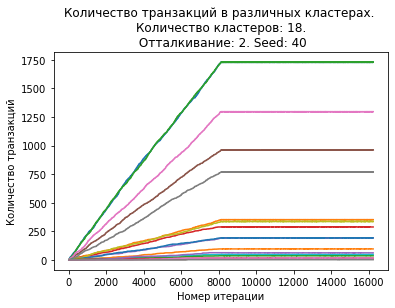

Итерация:  2 . Номер шага 1000 . Число кластеров:  18
Итерация:  2 . Номер шага 2000 . Число кластеров:  18
Итерация:  2 . Номер шага 3000 . Число кластеров:  18
Итерация:  2 . Номер шага 4000 . Число кластеров:  18
Итерация:  2 . Номер шага 5000 . Число кластеров:  18
Итерация:  2 . Номер шага 6000 . Число кластеров:  18
Итерация:  2 . Номер шага 7000 . Число кластеров:  18
Итерация:  2 . Номер шага 8000 . Число кластеров:  18


In [17]:
while clope.next_step(mushrooms, repulsion, noiseLimit) > 0:
    clope.print_history_count(repulsion, seed)

In [18]:
df = get_count_clusters(clope)
df

,e,p
0,0,1728
1,144,208
2,1728,0
3,288,0
4,192,0
5,704,256
6,0,1296
7,768,0
8,0,336
9,48,0


Внимательный читатель мог обратить внимание на кластеры маленькой размерности. Они являют собой транзакции, которые сильно отличаются от остальных. Это может быть расценено как шум. Об этой замечательной особенности данного алгоритма: детекции шума, - поговорим ниже.

Также, одной из проблем алгоритма является является выбор последовательности обработки транзакций. Или, иными словами: выбор начальной конфигурации алгоритма.

# Выводы. Плюсы и минусы алгоритма

**Плюсы:**

* Временная сложность. Глобальный критерий оптимизации
* Быстрая сходимость
* Параметризация по $r$
* Качество кластеризации (согласно заявлениям авторов)
* Возможность выделять шумы

**Минусы**

* Выбор начального состояния (начальный порядок объектов)
* Лавионообразное появление кластеров при большом количестве транзакций
* Долгое выполнение при большом числе кластеров
* Большие кластеры являются сильно притягивают к себе новые объекты
* Проблема с дообучением при заданном априори разбиении
* В авторском алгоритме отсутствует упоминание про взвешивание
* Наличие нескольких одинаковых объектов в транзакции может сильно повлиять на результат
* Отсутствиие аппарата, позволяющего учитывать ранговые признаки. А значит невозможно работать с временными рядами